In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets import the dataset:

In [10]:
rain=pd.read_csv("D:/Data-Sets/rain_prediction-master/bhubaneswar_2018.csv")

In [13]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2386 non-null   int64  
 1   date          2386 non-null   object 
 2   temp          2386 non-null   int64  
 3   dew_pt        2386 non-null   int64  
 4   hum           2386 non-null   int64  
 5   wind_spd      2385 non-null   float64
 6   wind_gust     0 non-null      float64
 7   dir           1918 non-null   object 
 8   vis           2386 non-null   int64  
 9   pressure      2365 non-null   float64
 10  wind_chill    0 non-null      float64
 11  heat_index    0 non-null      float64
 12  precip        0 non-null      float64
 13  precip_rate   0 non-null      float64
 14  precip_total  0 non-null      float64
 15  cond          2116 non-null   object 
 16  fog           2386 non-null   int64  
 17  rain          2386 non-null   int64  
 18  snow          2386 non-null 

Now,Lets see the top 5 entries in our dataset:

In [14]:
rain.head()

,Unnamed: 0,date,temp,dew_pt,hum,wind_spd,wind_gust,dir,vis,pressure,...,precip,precip_rate,precip_total,cond,fog,rain,snow,hail,thunder,tornado
0,1,01-01-2018 02:30,69,64,80,2.3,NaN,NNW,1,29.87,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
1,2,01-01-2018 05:30,68,65,87,4.6,NaN,NNW,1,29.84,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
2,3,01-01-2018 08:30,71,64,71,6.9,NaN,NW,1,29.92,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
3,4,01-01-2018 11:30,79,69,64,4.6,NaN,East,2,29.89,...,NaN,NaN,NaN,Haze,0,0,0,0,0,0
4,5,01-01-2018 14:30,79,64,51,6.9,NaN,ENE,2,29.82,...,NaN,NaN,NaN,Scattered Clouds,0,0,0,0,0,0


Now,Lets have a graphical representation:

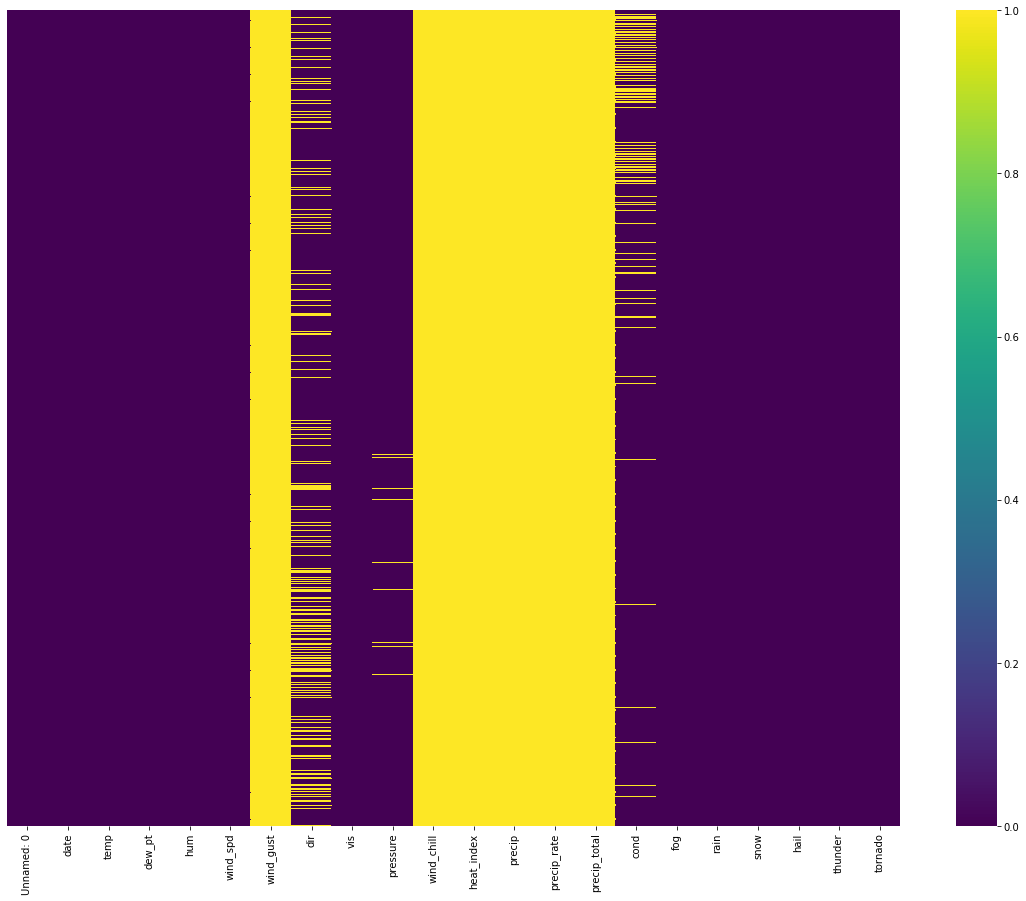

In [18]:
plt.figure(figsize=[20,15])
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

Now,Lets print the column details:

In [19]:
rain.columns

Index(['Unnamed: 0', 'date', 'temp', 'dew_pt', 'hum', 'wind_spd', 'wind_gust',
       'dir', 'vis', 'pressure', 'wind_chill', 'heat_index', 'precip',
       'precip_rate', 'precip_total', 'cond', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'tornado'],
      dtype='object')

Now,Lets drop the columns which is of no use:

In [22]:
rain.drop(['Unnamed: 0', 'wind_gust', 'wind_chill', 'heat_index', 'precip',
       'precip_rate', 'precip_total','cond', 'fog','snow', 'hail',
       'thunder', 'tornado','dir'],axis=1,inplace= True)

In [23]:
rain.columns

Index(['date', 'temp', 'dew_pt', 'hum', 'wind_spd', 'vis', 'pressure', 'rain'], dtype='object')

Now,Lets set the index as date:

In [24]:
rain=rain.set_index('date')

In [26]:
rain.index=pd.DatetimeIndex(rain.index)

In [27]:
rain.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
date,,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [28]:
rain.index.date

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), ..., datetime.date(2018, 1, 11),
       datetime.date(2018, 1, 11), datetime.date(2018, 1, 11)],
      dtype=object)

Now,Lets see the data for 20 entries:

In [29]:
rain.head(20)

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
date,,,,,,,
2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0
2018-01-01 17:30:00,76,67,65,6.9,2,29.81,0
2018-01-01 20:30:00,74,65,65,4.6,2,29.87,0
2018-01-01 23:30:00,71,64,71,4.6,2,29.87,0
2018-02-01 02:30:00,69,61,69,4.6,1,29.84,0


Lets copy this cleaned data to a new DataFrame:

In [30]:
data_old=rain.copy()

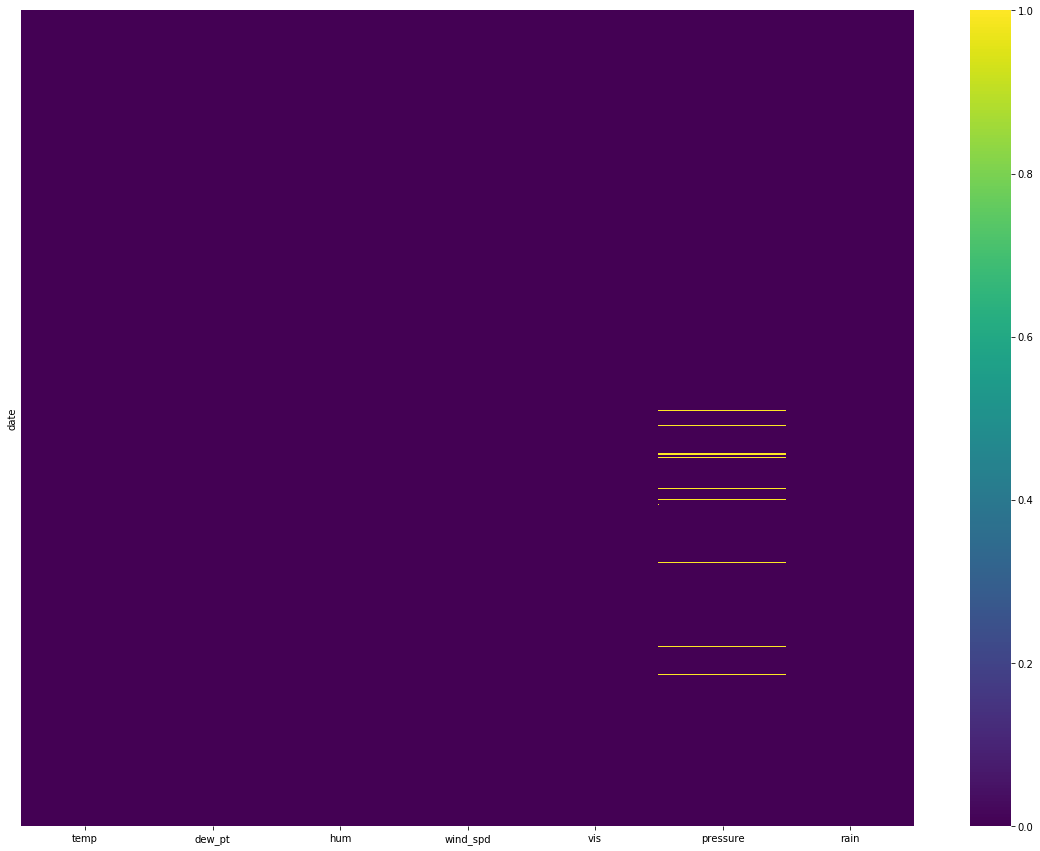

In [31]:
plt.figure(figsize=[20,15])
sns.heatmap(data_old.isnull(),yticklabels=False,cmap='viridis')

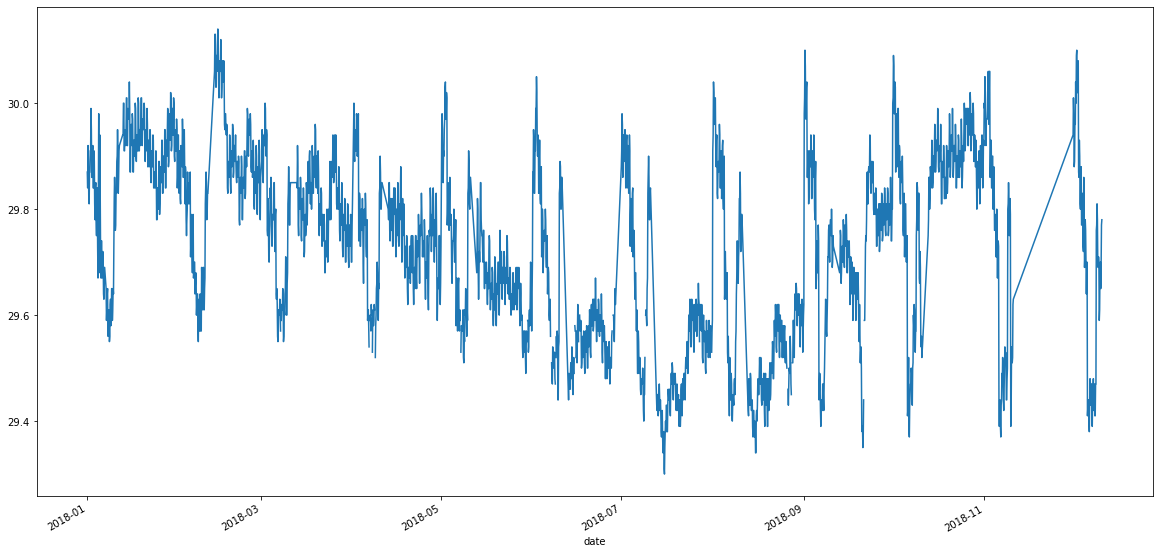

In [32]:
plt.figure(figsize=[20,10])
data_old.pressure.plot()

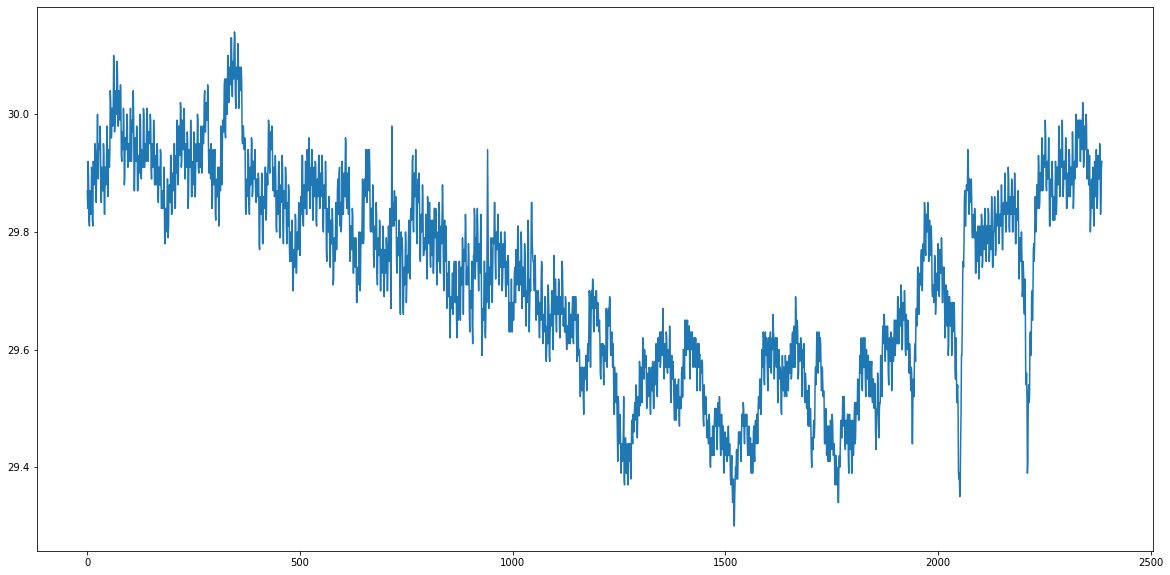

In [33]:
plt.figure(figsize=[20,10])
data.pressure.fillna(data.pressure.rolling(16,min_periods=1).mean(),inplace=True)
data.pressure.plot()

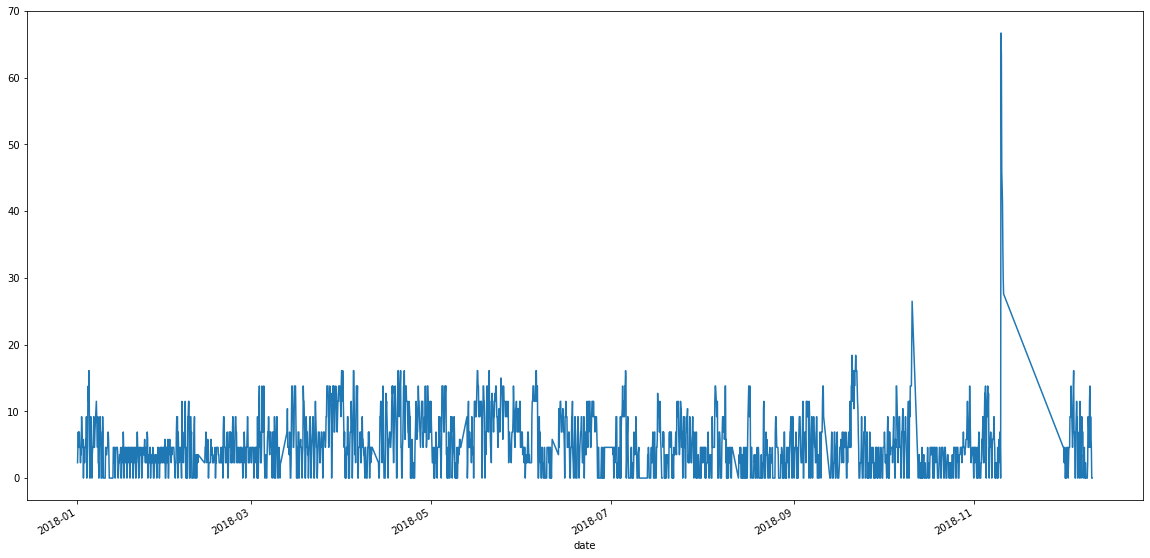

In [34]:
plt.figure(figsize=[20,10])
data_old.wind_spd.plot()

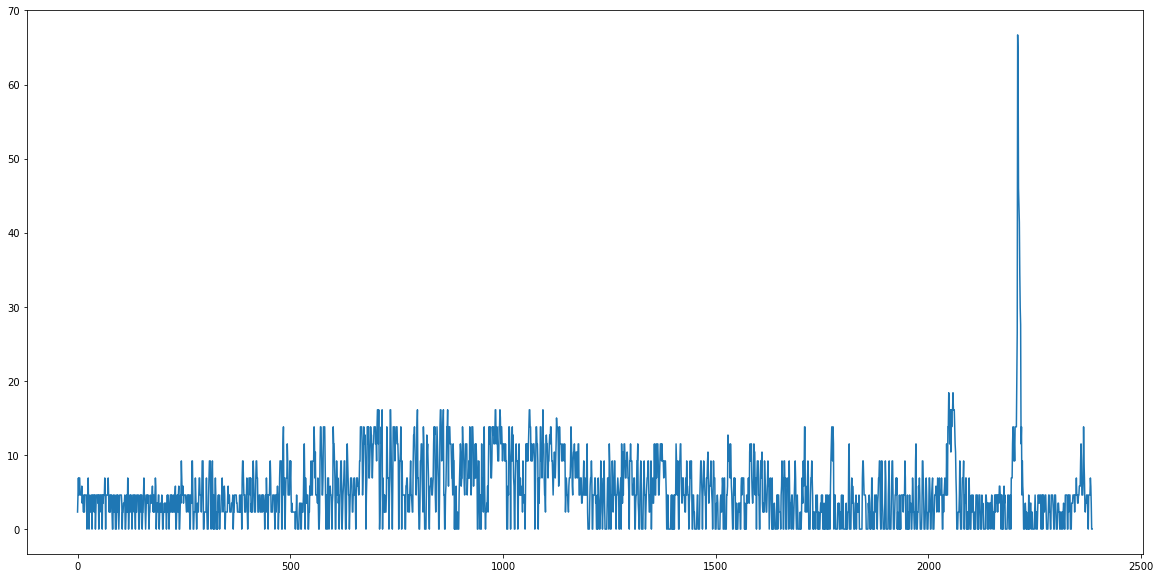

In [35]:
plt.figure(figsize=[20,10])
data.wind_spd.fillna(data.wind_spd.rolling(8,min_periods=1).mean(),inplace=True)
data.wind_spd.plot()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2386 non-null   object 
 1   temp      2386 non-null   int64  
 2   dew_pt    2386 non-null   int64  
 3   hum       2386 non-null   int64  
 4   wind_spd  2386 non-null   float64
 5   vis       2386 non-null   int64  
 6   pressure  2386 non-null   float64
 7   rain      2386 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 149.2+ KB


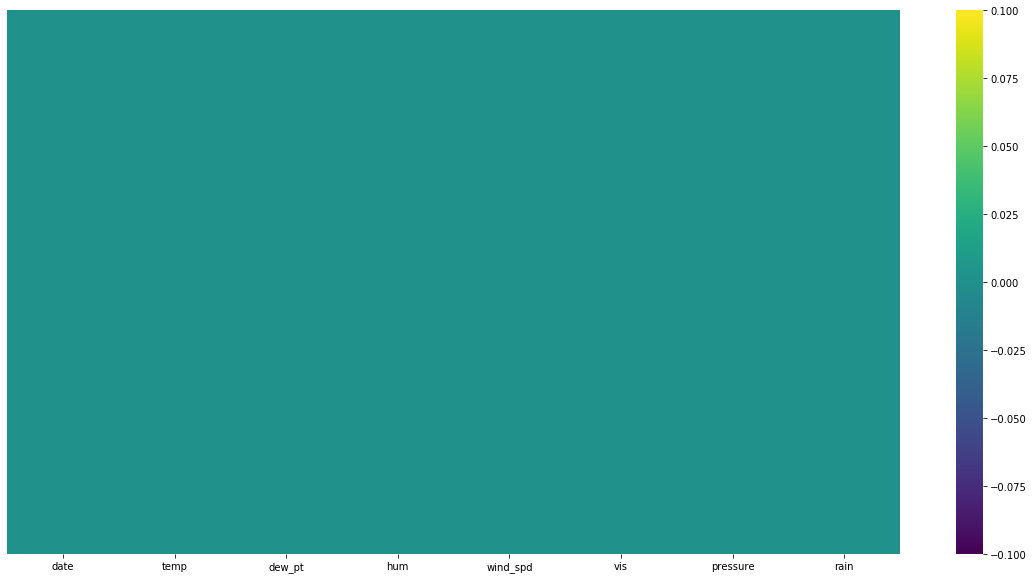

In [38]:
plt.figure(figsize=[20,10])
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [39]:
data.to_csv('cleaned_Data.csv')